In [55]:
import pandas as pd
import numpy as np

In [56]:
dataset=pd.read_csv('BankNote_Authentication.csv')

In [57]:
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
dataset.shape

(1372, 5)

In [5]:
dataset.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
dataset['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

## It is a balanced dataset and also there are no null values.

In [7]:
import seaborn as sns
# sns.heatmap(data=dataset.isnull(),yticklabels=False,cmap='viridis')

In [8]:
#Discrete features
discrete_feature=[feature for feature in dataset if len(dataset[feature].unique())<25]
print(f"Discrete feature count {len(discrete_feature)}")

Discrete feature count 1


In [9]:
discrete_feature

['class']

In [10]:
#Continuous features
continuous_feature=[feature for feature in dataset if feature not in discrete_feature]
print(f"Continuous variable count {len(continuous_feature)}")

Continuous variable count 4


In [11]:
continuous_feature

['variance', 'skewness', 'curtosis', 'entropy']

In [12]:
import matplotlib.pyplot as plt

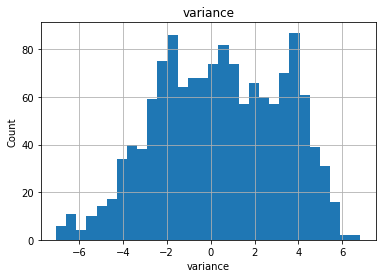

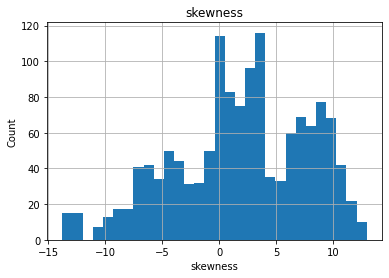

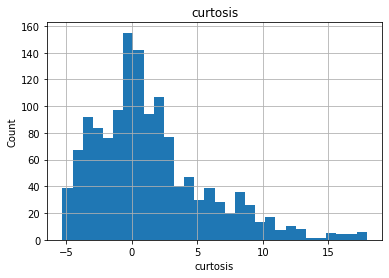

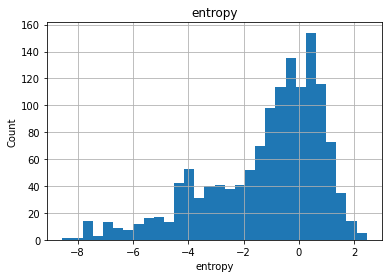

In [13]:
for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

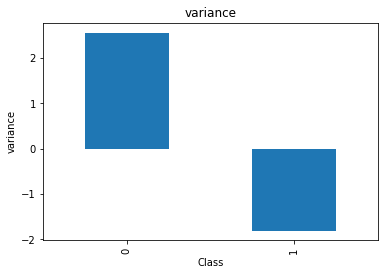

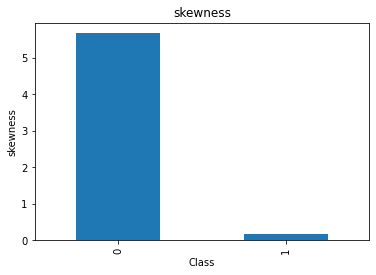

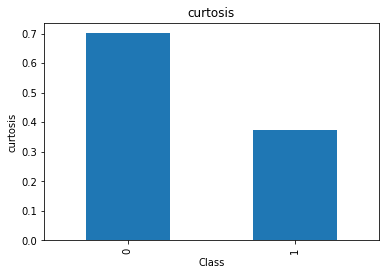

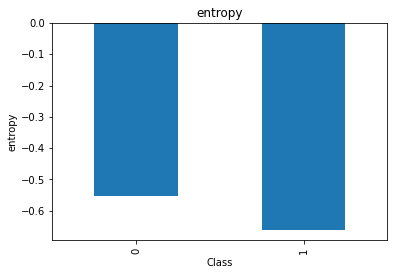

In [14]:
for feature in continuous_feature:
    data=dataset.copy()
    data.groupby(data['class'])[feature].median().plot.bar()
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [15]:
dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [16]:
corr=dataset.corr()

In [17]:
corr['class'].sort_values(ascending=False)

class       1.000000
curtosis    0.155883
entropy    -0.023424
skewness   -0.444688
variance   -0.724843
Name: class, dtype: float64

<AxesSubplot:>

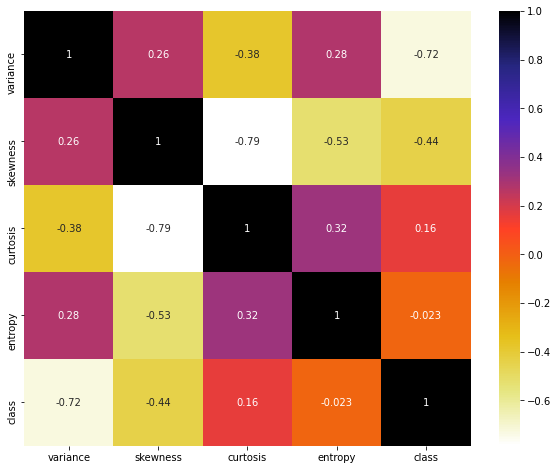

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [19]:
# sns.pairplot(dataset,hue='class')

<AxesSubplot:xlabel='skewness', ylabel='variance'>

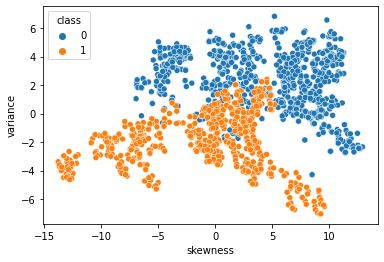

In [20]:
sns.scatterplot(data=dataset,y='variance',x='skewness',hue='class')

## Outliers

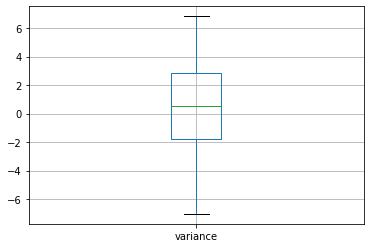

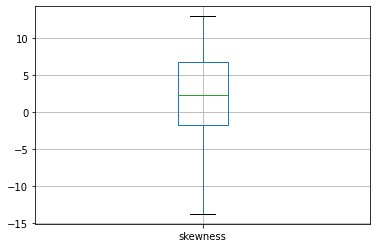

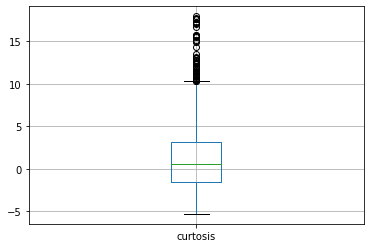

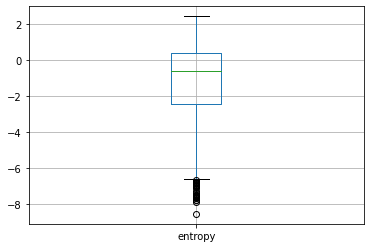

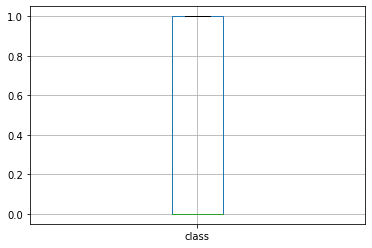

In [21]:
for feature in dataset.columns:
    data=dataset.copy()
    data.boxplot(column=feature)
    plt.show()

In [22]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
import scipy.stats as stat
import pylab 
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(bins=30)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

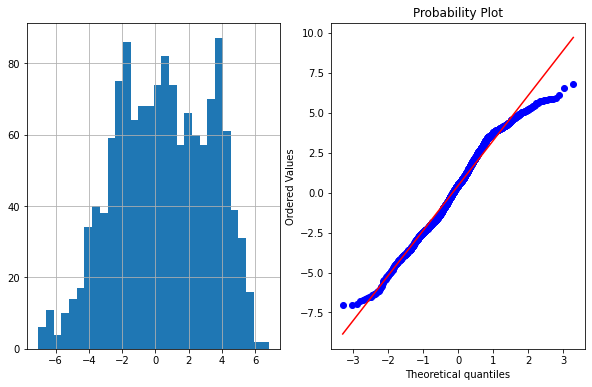

In [23]:
plot_data(dataset,'variance')

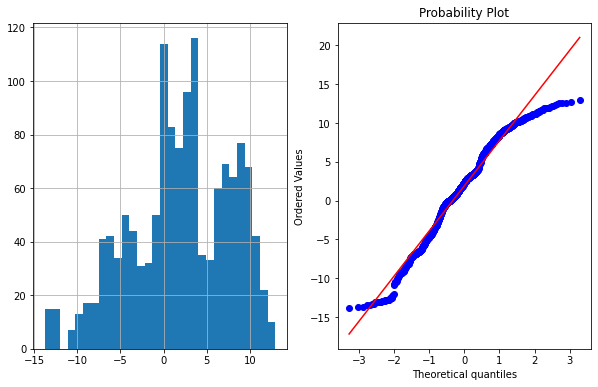

In [24]:
plot_data(dataset,'skewness')

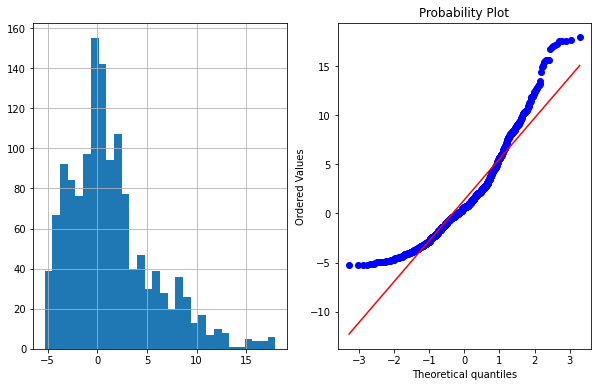

In [25]:
plot_data(dataset,'curtosis')

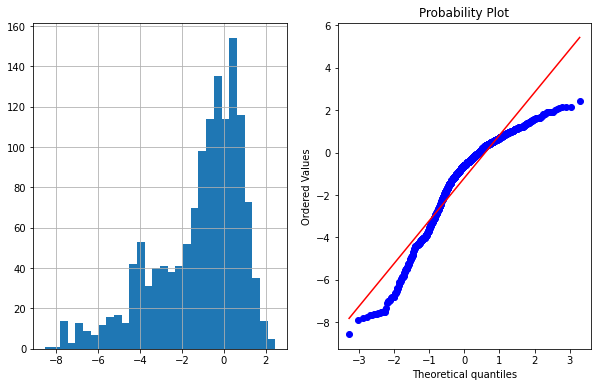

In [26]:
plot_data(dataset,'entropy')

In [27]:
# dataset['cur_log']=dataset['curtosis']**(1/2)
# # u = np.log(y + 1 - min(y))
# dataset['cur_log']=np.log(dataset['curtosis'] +1-min(dataset['curtosis']))
# plot_data(dataset,'cur_log')

In [28]:
dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [29]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

## Train-test split 

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
X_train_SC=scaler.fit_transform(X_train)
X_test_SC=scaler.transform(X_test)

## Logistic Regresion

In [61]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train_SC,y_train)

LogisticRegression()

In [62]:
## on training data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=log_model.predict(X_train_SC)
score=accuracy_score(y_train,pred)
score

0.9817684594348223

In [63]:
## on testing data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=log_model.predict(X_test_SC)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score,'\n',cm)
print(classification_report(y_test,y_pred))

0.9781818181818182 
 [[144   4]
 [  2 125]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [88]:
# for selecting threshold value 
import numpy as np
def predict_threshold(model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)
for thres in np.arange(0,1,0.1):
    y_predict=predict_threshold(log_model,X_test_SC,thres)
    print(f"Threshold: {thres}")
    print(confusion_matrix(y_test,y_predict))

Threshold: 0.0
[[  0 148]
 [  0 127]]
Threshold: 0.1
[[135  13]
 [  0 127]]
Threshold: 0.2
[[142   6]
 [  0 127]]
Threshold: 0.30000000000000004
[[144   4]
 [  0 127]]
Threshold: 0.4
[[144   4]
 [  1 126]]
Threshold: 0.5
[[144   4]
 [  2 125]]
Threshold: 0.6000000000000001
[[145   3]
 [  2 125]]
Threshold: 0.7000000000000001
[[148   0]
 [  4 123]]
Threshold: 0.8
[[148   0]
 [ 10 117]]
Threshold: 0.9
[[148   0]
 [ 24 103]]


## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
random_cl=RandomForestClassifier()
random_cl.fit(X_train_SC,y_train)

RandomForestClassifier()

In [37]:
## on training data
pred=random_cl.predict(X_train_SC)
score=accuracy_score(y_train,pred)
score

1.0

In [38]:
## on testing data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=random_cl.predict(X_test_SC)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score,'\n',cm)
print(classification_report(y_test,y_pred))

0.9890909090909091 
 [[147   1]
 [  2 125]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.99      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



## KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_SC,y_train)

KNeighborsClassifier()

In [40]:
## on training data
pred=knn.predict(X_train_SC)
score=accuracy_score(y_train,pred)
score

0.9981768459434822

In [41]:
## on testing data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=knn.predict(X_test_SC)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score,'\n',cm)
print(classification_report(y_test,y_pred))

1.0 
 [[148   0]
 [  0 127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## Support Vector Classifier

In [42]:
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train_SC,y_train)

SVC(probability=True)

In [43]:
## on training data
pred=svc.predict(X_train_SC)
score=accuracy_score(y_train,pred)
score

1.0

In [44]:
## on testing data
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=svc.predict(X_test_SC)
score=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(score,'\n',cm)
print(classification_report(y_test,y_pred))

1.0 
 [[148   0]
 [  0 127]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00       127

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## Cross Validation to avoid Overfitting

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X,y, scoring="accuracy", cv=10).mean()
print(scores)

0.9963503649635037


In [70]:
from sklearn.metrics import roc_auc_score,roc_curve
def roc_auc(modelnm,model,X_test,y_test):
    pred_prob=model.predict_proba(X_test)
    fpr,tpr,threshold=roc_curve(y_test,pred_prob[:,1])
    auc_score=roc_auc_score(y_test,pred_prob[:,1])
    print(f"AUC score for: {modelnm} is {auc_score}")
roc_auc('Logistic',log_model,X_test_SC,y_test)
roc_auc('KNearest Classifier',knn,X_test_SC,y_test)
roc_auc('RFC',random_cl,X_test_SC,y_test)
roc_auc('SVC',svc,X_test_SC,y_test)

AUC score for: Logistic is 0.9994679719089169
AUC score for: KNearest Classifier is 1.0
AUC score for: RFC is 0.9998935943817834
AUC score for: SVC is 1.0


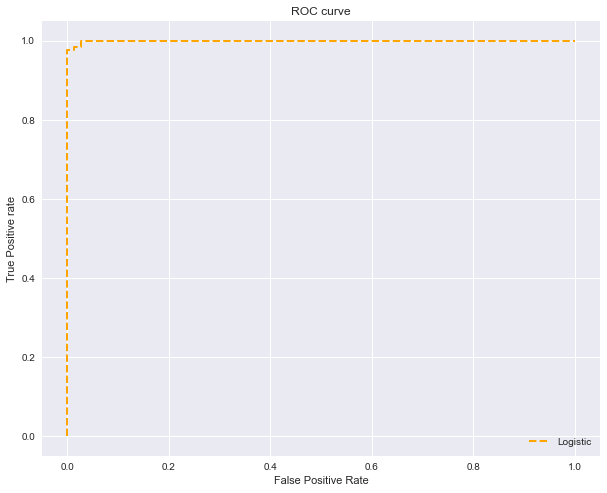

In [84]:
def plot(modelnm,model,X_test,y_test):
    pred_prob=model.predict_proba(X_test)
    fpr,tpr,threshold=roc_curve(y_test,pred_prob[:,1])
    plt.style.use('seaborn')
    plt.figure(figsize=(10,8))
    plt.plot(fpr, tpr, linestyle='--',color='orange',label=modelnm,lw=2)
    plt.legend()
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')
plot('Logistic',log_model,X_test_SC,y_test)



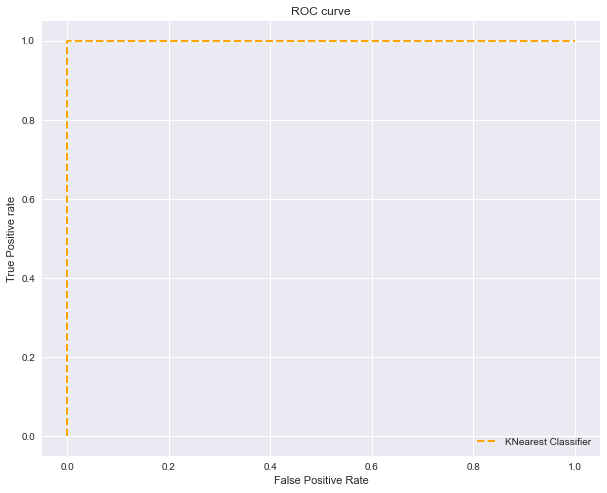

In [85]:
plot('KNearest Classifier',knn,X_test_SC,y_test)

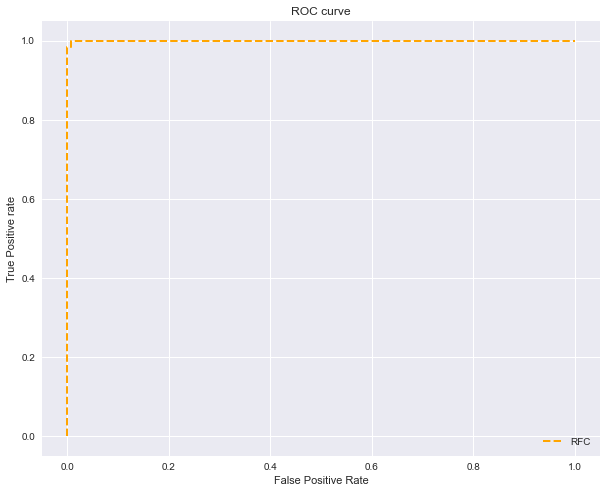

In [86]:
plot('RFC',random_cl,X_test_SC,y_test)

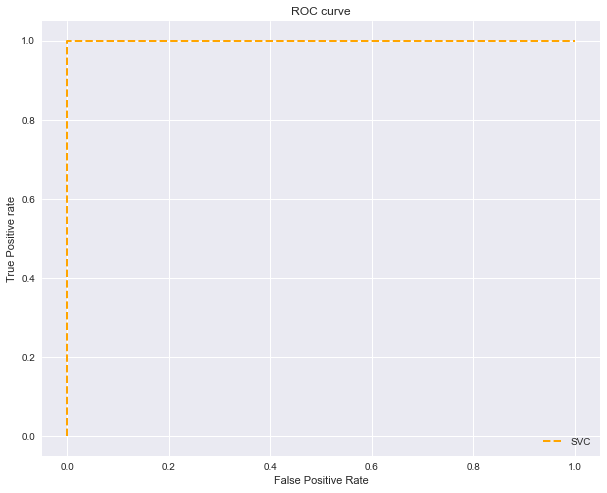

In [87]:
plot('SVC',svc,X_test_SC,y_test)


### As we see that SVC model is working better than other models so we can choose SVC as our genearalized model.

#### Saving the model using pickle

In [50]:
import pickle 
pickle.dump(svc,open("svc.pkl",'wb'))

In [51]:
pickle.dump(scaler,open('Scaler.pkl','wb'))

In [52]:
test=scaler.transform([[3.62160,8.6661,-2.8073,-0.44699]])

In [53]:
svc.predict(test)

array([0], dtype=int64)